# Preparação e análise de Dados em Python #

Nesta aula, aprenderemos um pouco a como entender melhor um conjunto de dados. Nos tempos atuais, é cada vez mais fácil conseguir quantidades cada vez maiores de dados. Contudo, isto vem com um custo: quanto mais dados, mais difícil é de __entender__ os mesmos.

Hoje, aprenderemos a utilizar a biblioteca Pandas para manipular dados.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#!pip3 install pandas --user

Na aula de hoje, usaremos uma base de dados sobre número de vendas de jogos de videogame até 2016. Nosso objetivo é entender melhor os dados para na sequência produzir modelos de regressão que melhor prevejam os números de vendas. Baixe o arquivo que está no Colabweb e coloque-o descomprimido na mesma pasta em que está rodando este notebook:

In [3]:
vg = pd.read_csv('Video_Games.csv')

O Pandas é uma biblioteca de manipulação de dados. A função read_csv lê __todo__ conteúdo do arquivo e coloca em uma estrutura de dados. Existem funções similares para diversos tipos de arquivos, como `xls` e `json`.

Agora vamos visualizar o conteúdo dos nossos dados. Para isto, usaremos a função head, que mostra os 5 primeiros registros:

In [4]:
#vg.head()
#vg.tail()
vg.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
11808,And1 Streetball,XB,2006.0,Action,Ubisoft,0.06,0.02,0.00,0.00,0.07,NaN,NaN,NaN,NaN,NaN,NaN
8784,Family Party: Fitness Fun,Wii,2010.0,Sports,D3Publisher,0.14,0.00,0.00,0.01,0.15,NaN,NaN,tbd,NaN,Tamsoft,E10+
1770,FIFA Soccer 10,PSP,2009.0,Sports,Electronic Arts,0.15,0.67,0.01,0.31,1.15,83.0,9.0,7.9,14.0,EA Sports,E
9307,Magnetica,DS,2006.0,Puzzle,Nintendo,0.08,0.01,0.03,0.01,0.14,68.0,33.0,8.1,11.0,Mitchell,E
4326,Fatal Fury 2,SNES,1993.0,Fighting,Takara,0.00,0.00,0.45,0.00,0.45,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
vg.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [6]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Acessando os dados de um jogo especifico:

In [7]:
#vg.loc[130]
#vg2 = vg.loc[[1,5,10,20]]
vg.loc[0:100]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.27,1.37,2.43,0.48,7.55,NaN,NaN,NaN,NaN,NaN,NaN
97,Super Mario Galaxy 2,Wii,2010.0,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51,97.0,87.0,9.1,1854.0,Nintendo EAD Tokyo,E
98,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46,NaN,NaN,NaN,NaN,NaN,NaN
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.59,2.11,0.01,0.68,7.39,NaN,NaN,NaN,NaN,NaN,NaN


Podemos também acessar colunas especificas através dos seus nomes:

In [8]:
#vg[ ['Name','Critic_Score'] ]

vg.Global_Sales

,Global_Sales
0,82.53
1,40.24
2,35.52
3,32.77
4,31.37
...,...
16714,0.01
16715,0.01
16716,0.01
16717,0.01


Quantos jogos para cada sistema nós temos?

<Axes: xlabel='Genre'>

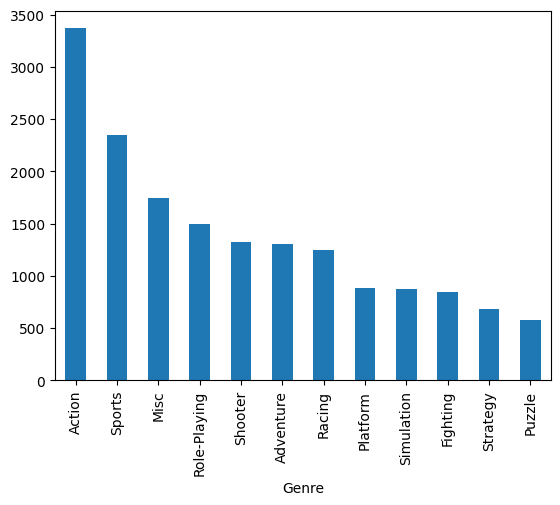

In [15]:
vg.Genre.value_counts().plot(kind='bar')


Contando a quantidade de valores diferentes de um atributo numérico:

In [9]:
vg.Critic_Score.value_counts()

,count
Critic_Score,
70.0,256
71.0,254
75.0,245
78.0,240
73.0,238
...,...
20.0,3
21.0,1
17.0,1


Muito né? melhor seria colocar em categorias:

In [10]:
b = list(range(0,101,10))
#b
vg.Critic_Score.value_counts(bins=b)


,count
"(70.0, 80.0]",2344
"(60.0, 70.0]",1949
"(80.0, 90.0]",1518
"(50.0, 60.0]",1188
"(40.0, 50.0]",571
"(90.0, 100.0]",257
"(30.0, 40.0]",236
"(20.0, 30.0]",63
"(10.0, 20.0]",11
"(-0.001, 10.0]",0


O Pandas oferece vários métodos para entender melhor os dados com estatísticas básicas:

In [11]:
vg.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Epa! Tem um jogo com lançamento em 2020! Não pode, pois a base é de jogos lançados até 2016. Na verdade, isso é super comum com dados reais, de haver sujeira na base de dados.

E agora, como podemos identificar que jogo é esse ?

In [12]:
vg[vg.Year_of_Release==2020]
#vg.loc[vg.Year_of_Release==2020, ['Year_of_Release']] = [2010]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E


Conseguiu entender como funcionou? Brinque um pouco com os dados para entender melhor.

Quais são os jogos mais recentes da base para Nintendo Wii?

In [13]:
vg[vg.Platform=='PS2'].sort_values(['Global_Sales','Year_of_Release'],ascending = False).head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9,1588.0,Rockstar North,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,8.7,730.0,Rockstar North,M
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,95.0,54.0,8.4,314.0,Polyphony Digital,E
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,97.0,56.0,8.5,664.0,DMA Design,M
48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66,89.0,74.0,8.5,272.0,Polyphony Digital,E


A saída de boa parte de comandos em Pandas gera objetos do tipo dataframe ou series. Estes objetos novos podem ser utilizados com outras funções pandas, em cascata.

Isto são condições compostas

Jogos de PS3 que tiveram mais do que 20 críticas ordenados pela nota da critica:

In [40]:
#vg[(vg.Platform=='PS2')][(vg.Critic_Count>20)].sort_values(['Critic_Score']).head()
vg[(vg.Platform=='PS2') & (vg.Critic_Count>20)].sort_values(['Critic_Score']).head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
12012,McFarlane's Evil Prophecy,PS2,NaN,Action,Konami Digital Entertainment,0.03,0.03,0.0,0.01,0.07,34.0,28.0,3.2,5.0,Konami,M
5337,Charlie and the Chocolate Factory,PS2,2005.0,Adventure,Global Star,0.17,0.13,0.0,0.04,0.35,35.0,21.0,4.1,28.0,"High Voltage Software, Backbone Entertainment",E
7982,Fight Club,PS2,2004.0,Fighting,Vivendi Games,0.09,0.07,0.0,0.02,0.18,36.0,28.0,4.4,22.0,Genuine Games,M
1230,The Simpsons Skateboarding,PS2,2002.0,Sports,Electronic Arts,0.36,0.90,0.0,0.27,1.52,38.0,21.0,5.0,26.0,The Code Monkeys,T
3449,Terminator 3: Rise of the Machines,PS2,2003.0,Action,Atari,0.28,0.22,0.0,0.07,0.58,38.0,21.0,6.3,23.0,Black Ops Entertainment,T


Exercício 1:


1 - Gere uma base vg2, contendo todos os jogos lançados de 2000 a 2016 e a descreva com describe

2 - Mostre todos os jogos lançados até o ano 2000 onde as vendas japonesas foram acima das americanas, ordenado por vendas globais

3 - Conte, para cada plataforma, quantos jogos com nota de usuário acima de 8 cada uma tem

In [22]:
# Questão 1
vg2 = vg[(vg['Year_of_Release'].between(2000, 2016))]
print(vg2.describe())

       Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     14470.000000  14470.000000  14470.000000  14470.000000   
mean       2008.022322      0.243926      0.144133      0.056380   
std           4.111160      0.713256      0.513172      0.249723   
min        2000.000000      0.000000      0.000000      0.000000   
25%        2005.000000      0.000000      0.000000      0.000000   
50%        2008.000000      0.080000      0.020000      0.000000   
75%        2011.000000      0.230000      0.110000      0.030000   
max        2016.000000     41.360000     28.960000      6.500000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count   User_Score  \
count  14470.000000  14470.000000   7887.000000   7887.000000  7371.000000   
mean       0.050319      0.495031     68.858882     26.601750     7.110975   
std        0.198335      1.463424     13.869432     19.041747     1.498326   
min        0.000000      0.010000     13.000000      3.000000     0.000000 

In [26]:
# Questão 2
jap_maior_usa = vg[(vg['Year_of_Release'] <= 2000) & (vg['JP_Sales'] > vg['NA_Sales'])].sort_values('Global_Sales', ascending=False)
print(jap_maior_usa[['Name', 'Year_of_Release', 'JP_Sales', 'NA_Sales', 'Global_Sales']])


                                               Name  Year_of_Release  \
65                                Final Fantasy VII           1997.0   
76                                 Super Mario Kart           1992.0   
88                               Final Fantasy VIII           1999.0   
137            Street Fighter II: The World Warrior           1992.0   
151                                 Resident Evil 2           1998.0   
...                                             ...              ...   
15790  World Class Rugby 2: Kokunai Gekitou Hen '93           1994.0   
15959           Strongest Tokyo University Shogi DS           1985.0   
16209                           Rock N' Roll Racing           1993.0   
16329                                 Victory Spike           1996.0   
16472                                   Meru Purana           1996.0   

       JP_Sales  NA_Sales  Global_Sales  
65         3.28      3.01          9.72  
76         3.81      3.54          8.76  
88       

In [28]:
# Questão 3
plataforma_contagem = vg[vg['User_Score'] > 8]['Platform'].value_counts()
print(plataforma_contagem)

Platform
PS2     590
XB      275
PC      237
GC      164
X360    148
Wii     137
PS3     136
GBA     122
DS      116
PSP     100
PS       97
PSV      43
PS4      41
3DS      39
WiiU     21
XOne     21
DC       11
Name: count, dtype: int64


### Usando pandas para plotar com pyplot ###

Uma coisa legal no pandas é que ele é integrado ao pyplot/matplotlib.

Exemplo: Qual a relação entre as vendas globais e a nota da crítica?

<Axes: xlabel='Critic_Score', ylabel='Global_Sales'>

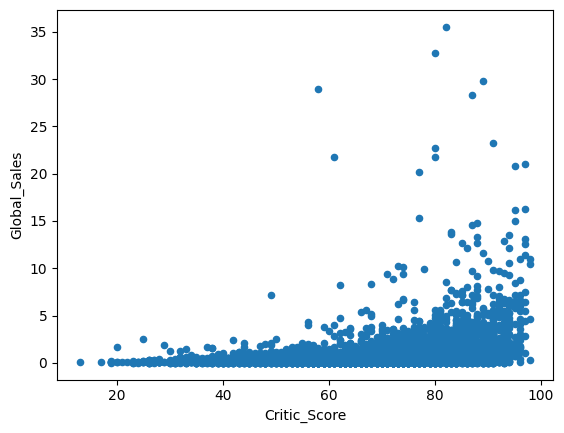

In [29]:
vg[vg.Global_Sales<80].plot(kind='scatter',x='Critic_Score',y='Global_Sales')
#outlier
#vg[vg.Global_Sales>80]

Os valores muito altos (como o Wii Sports com 80 milhões de cópias), estão dificultando a visualização. Para resolver este problema, podemos ou eliminar estes valores do plot ou plotar em escala logaritmica:

<Axes: xlabel='Critic_Score', ylabel='Global_Sales'>

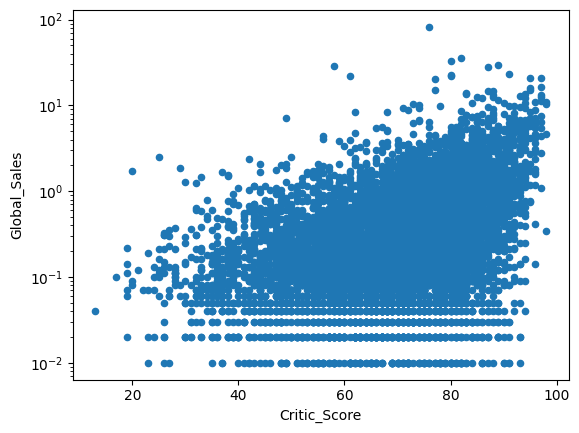

In [30]:
#vg[vg.Global_Sales<20].plot(kind='scatter',x='Critic_Score',y='Global_Sales')

vg.plot(kind='scatter',x='Critic_Score',y='Global_Sales',logy=True)

### Outras correlações mais sofisticadas ###

Como será a comparação entre as notas dos críticos para RPGs em comparação com jogos de corrida?

<Axes: >

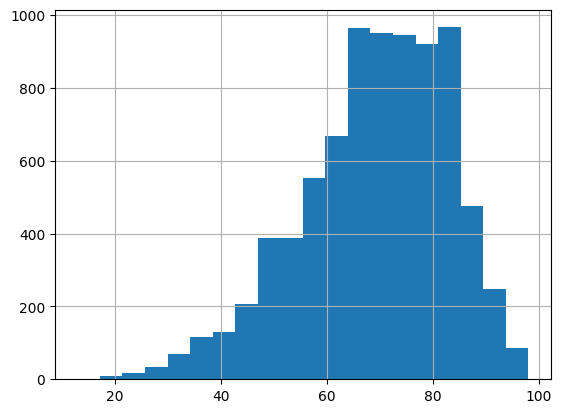

In [31]:
# Primeiro veremos o histograma global
vg.Critic_Score.hist(bins = 20)

<Axes: >

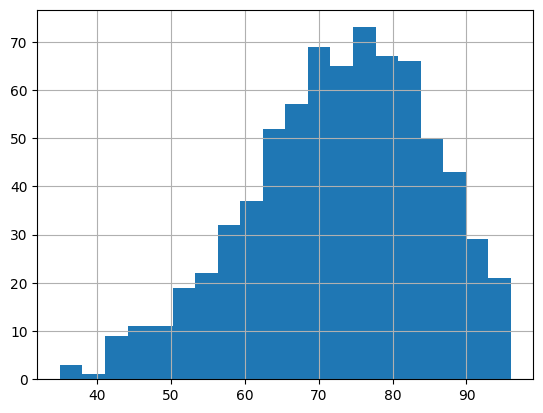

In [32]:
#Agora apenas dos RPGs
vg[vg.Genre=='Role-Playing'].Critic_Score.hist(bins = 20)

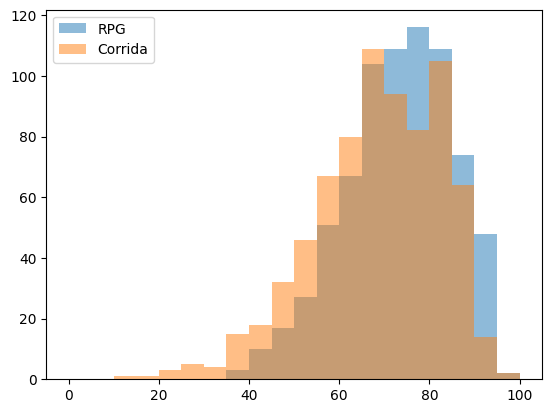

In [33]:
# Podemos comparar os RPGs com os jogos de corrida

bins = list(range(0,101,5))
vgval = vg[vg.Critic_Score.notnull()] # Remover os jogos sem valor de Critic_Score

plt.hist(vgval[vgval.Genre=='Role-Playing'].Critic_Score,bins,alpha=0.5,label='RPG')
plt.hist(vgval[vgval.Genre=='Racing'].Critic_Score,bins,alpha=0.5,label='Corrida')
plt.legend()


E se eu quiser comparar variáveis categóricas?

Vamos analisar duas: Gênero e Plataforma.

In [34]:
pd.crosstab(vg.Platform,vg.Genre,margins = True)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
Platform,,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0,133
3DO,0,1,0,0,0,1,0,0,0,1,0,0,3
3DS,188,38,14,54,28,20,11,88,7,31,26,15,520
DC,3,11,12,0,2,0,6,4,3,1,10,0,52
DS,340,238,36,391,91,236,67,200,42,284,148,79,2152
GB,6,5,0,8,19,15,2,21,1,5,9,7,98
GBA,167,38,23,110,142,41,64,73,40,18,88,18,822
GC,101,20,42,36,73,13,63,27,48,12,110,11,556
GEN,3,2,5,1,7,0,1,3,1,0,3,1,27


E se a gente quisesse esses valores em porcentagens? Podemos então aplicar uma __função lambda__ nos dados:

In [35]:
pd.crosstab(vg.Platform,vg.Genre,margins = True,normalize='index')#.apply(lambda v:100*v/v[-1],axis = 1)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,0.458647,0.015038,0.015038,0.037594,0.067669,0.082707,0.045113,0.000000,0.180451,0.007519,0.090226,0.000000
3DO,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
3DS,0.361538,0.073077,0.026923,0.103846,0.053846,0.038462,0.021154,0.169231,0.013462,0.059615,0.050000,0.028846
DC,0.057692,0.211538,0.230769,0.000000,0.038462,0.000000,0.115385,0.076923,0.057692,0.019231,0.192308,0.000000
DS,0.157993,0.110595,0.016729,0.181691,0.042286,0.109665,0.031134,0.092937,0.019517,0.131970,0.068773,0.036710
GB,0.061224,0.051020,0.000000,0.081633,0.193878,0.153061,0.020408,0.214286,0.010204,0.051020,0.091837,0.071429
GBA,0.203163,0.046229,0.027981,0.133820,0.172749,0.049878,0.077859,0.088808,0.048662,0.021898,0.107056,0.021898
GC,0.181655,0.035971,0.075540,0.064748,0.131295,0.023381,0.113309,0.048561,0.086331,0.021583,0.197842,0.019784
GEN,0.111111,0.074074,0.185185,0.037037,0.259259,0.000000,0.037037,0.111111,0.037037,0.000000,0.111111,0.037037


E se eu quiser uma tabela dessas, mas apenas contendo os jogos que venderam mais de 10 milhões de unidades?

In [36]:
pd.crosstab(vg[vg.Global_Sales>10].Platform,vg[vg.Global_Sales>10].Genre,margins = True)#,normalize='index')

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,All
Platform,,,,,,,,,,,,
3DS,0,0,0,0,1,0,1,2,0,0,0,4
DS,1,0,0,1,2,1,1,2,0,2,0,10
GB,0,1,0,0,1,1,0,3,0,0,0,6
GBA,0,0,0,0,0,0,0,2,0,0,0,2
N64,0,0,0,0,1,0,0,0,0,0,0,1
NES,0,0,0,0,2,0,0,0,1,0,0,3
PS,0,0,0,0,0,0,1,0,0,0,0,1
PS2,3,0,0,0,0,0,2,0,0,0,0,5
PS3,2,0,0,0,0,0,1,0,4,0,0,7


## Tabelas Pivo ##

Muitas vezes, queremos cruzar dados de formas mais complexas. A tabela pivo ajuda muito nisso.


Exemplo: Quem teve os melhores RPGs e adventures de acordo com a crítica? O primeiro ou o segundo Playstation?

In [37]:
rpgs = vg[(vg.Platform.isin(['PS2','PS']))& vg.Genre.isin(['Role-Playing','Adventure']) ]
#rpgs.head()
pivot = rpgs.pivot_table(values=['Critic_Score'],index = ['Platform','Genre'],aggfunc = ["mean",])
pivot

mean
                      Critic_Score
Platform Genre                    
PS       Adventure       58.000000
         Role-Playing    79.428571
PS2      Adventure       62.348837
         Role-Playing    71.639344

<Axes: ylabel='Platform,Genre'>

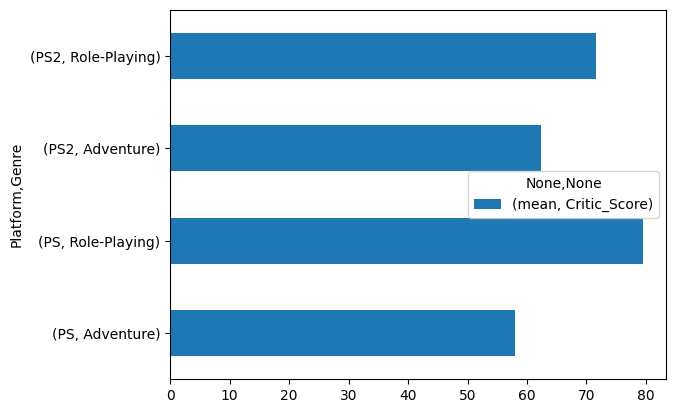

In [38]:
pivot.plot(kind='barh')

Exercício 2:

Faça uma tabela contendo a media das notas de usuários dos jogos das Publishers Capcom e Activision de acordo com o Rating

In [43]:
vg['User_Score'] = pd.to_numeric(vg['User_Score'], errors='coerce')
print(vg[vg['Publisher'].isin(['Capcom', 'Activision'])].pivot_table(values='User_Score', index='Publisher', columns='Rating', aggfunc='mean').rename_axis(index='Publicadora', columns='Classificação'))

Classificação         E      E10+         M         T
Publicadora                                          
Activision     6.689109  6.490909  6.146667  7.055185
Capcom         7.697500  8.125000  7.219277  7.349351


E se eu quiser saber quantas unidades o jogo mais vendido de cada plataforma vendeu?

In [44]:
#quantas unidades o jogo mais vendido de cada plataforma vendeu?
plats = vg[(vg.Platform.isin(['PS3','X360']))]

plats.pivot_table(values=['Global_Sales'],index = ['Platform','Genre'],aggfunc = ["max",])



max
                      Global_Sales
Platform Genre                    
PS3      Action              21.04
         Adventure            4.82
         Fighting             4.16
         Misc                 5.26
         Platform             5.82
         Puzzle               0.40
         Racing              10.70
         Role-Playing         6.41
         Shooter             13.79
         Simulation           1.94
         Sports               6.65
         Strategy             0.78
X360     Action              16.27
         Adventure            5.54
         Fighting             2.94
         Misc                21.81
         Platform             1.38
         Puzzle               0.32
         Racing               5.49
         Role-Playing         8.79
         Shooter             14.73
         Simulation           2.28
         Sports               6.19
         Strategy             2.62

## Agrupando ##

Você pode usar o comando groupby para gerar novas bases de dados modificadas. Por exemplo, você pode tentar prever as vendas totais de plataformas ao invés de jogos individuais. Contudo, para você utilizar os dados agrupados, você deve usar uma função de agregação (sum,count, min,max, mean, etc).

### Exemplo ###

Criando um agrupamento por plataforma

In [45]:
vgplat = vg.groupby(['Platform'])
vgplat.Global_Sales.sum()
vgplat.Critic_Score.min()

,Critic_Score
Platform,
2600,NaN
3DO,NaN
3DS,26.0
DC,80.0
DS,19.0
GB,NaN
GBA,23.0
GC,23.0
GEN,NaN


Fazendo uma relação para descobrir total de vendas de um console pelo total de jogos lançados para ele:

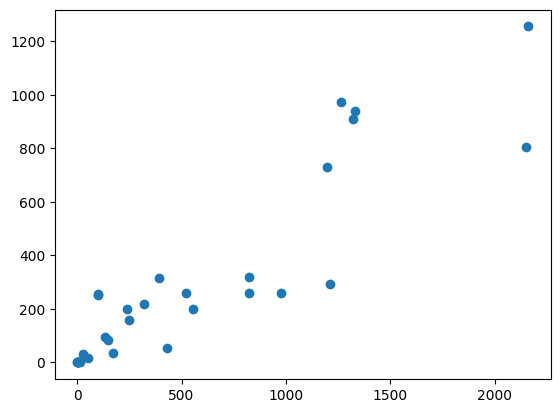

In [47]:
x = vgplat.Name.count()
y = vgplat.Global_Sales.sum()
plt.scatter(x,y)

<Axes: xlabel='Platform'>

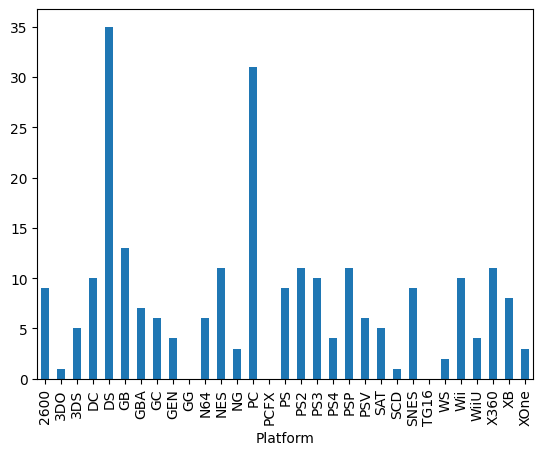

In [48]:
#Total de anos que um console teve jogos
anos = vgplat.Year_of_Release.max() - vgplat.Year_of_Release.min()
anos.plot(kind='bar')

In [50]:
vg['Year_of_Release'] = pd.to_numeric(vg['Year_of_Release'], errors='coerce')
print("Ano mínimo:", vg['Year_of_Release'].min())
print("Ano máximo:", vg['Year_of_Release'].max())


Ano mínimo: 1980.0
Ano máximo: 2020.0


Vocês poderiam usar a informação de ano para ponderar alguma outra informação usada na regressão por exemplo. Contudo, tem algo estranho né? O Nintendo DS está com 35 anos de jogos lançados. Vocês conseguem descobrir o porquê?

O motivo de o Nintendo DS aparecer com cerca de 35 anos de jogos lançados é que existem erros ou dados ausentes na coluna Year_of_Release do dataset Video_Games.csv.

O min() pega o menor valor de ano encontrado.

Platform
PC      24.0
GB      11.0
PSP     11.0
X360    11.0
PS2     11.0
DC      10.0
PS3     10.0
Wii     10.0
SNES     9.0
PS       9.0
Name: Year_of_Release, dtype: float64


<Axes: title={'center': 'Duração de lançamentos por plataforma (DS corrigido)'}, xlabel='Platform'>

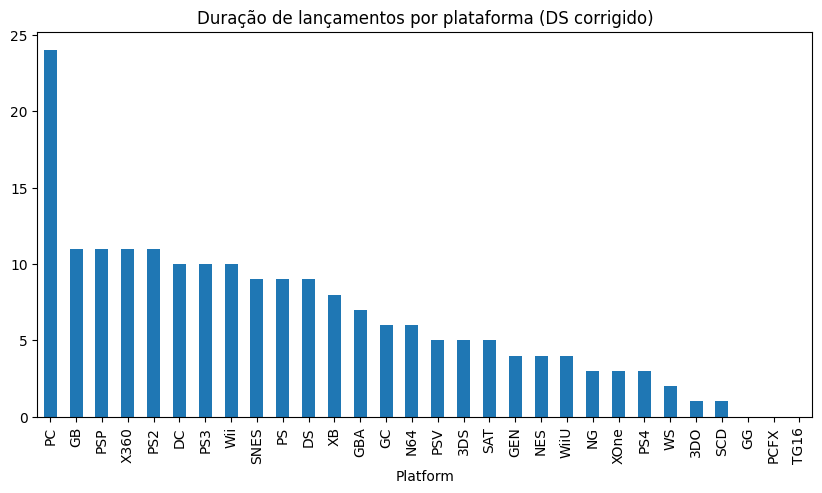

In [55]:
# limpar e corrigir anos
vg['Year_of_Release'] = pd.to_numeric(vg['Year_of_Release'], errors='coerce')
vg.loc[(vg['Platform'] == 'DS') & ~vg['Year_of_Release'].between(2004, 2014), 'Year_of_Release'] = np.nan
# filtrar anos válidos e calcular duração por plataforma
anos = (vg[vg['Year_of_Release'].between(1990, 2016)].groupby('Platform')['Year_of_Release'].agg(lambda x: x.max() - x.min()).sort_values(ascending=False))
print(anos.head(10))
anos.plot(kind='bar', figsize=(10,5), title='Duração de lançamentos por plataforma (DS corrigido)')
